In [9]:
import pandas as pd
from pycaret.classification import setup, compare_models, create_model, tune_model, evaluate_model, save_model, load_model, set_config

# 1. 데이터 가져오기
data = pd.read_csv("../../data/titanic_train.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
# 환경 설정
set_config('seed', 11)
expl = setup(data, target="Survived", ignore_features=['PassengerId', 'Name', 'Ticket', 'Cabin'])
expl

,Description,Value
0,Session id,5001
1,Target,Survived
2,Target type,Binary
3,Original data shape,"(891, 12)"
4,Transformed data shape,"(891, 10)"
5,Transformed train set shape,"(623, 10)"
6,Transformed test set shape,"(268, 10)"
7,Ignore features,4
8,Numeric features,5
9,Categorical features,2


In [12]:
# 모델 비교
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.8106,0.8592,0.6938,0.7901,0.7350,0.5891,0.5954,0.0170
ada,Ada Boost Classifier,0.7993,0.8366,0.7188,0.7581,0.7321,0.5723,0.5786,0.0140
lr,Logistic Regression,0.7960,0.8467,0.7145,0.7518,0.7238,0.5633,0.5716,0.0110
lightgbm,Light Gradient Boosting Machine,0.7913,0.8524,0.6774,0.7609,0.7125,0.5500,0.5559,0.1170
ridge,Ridge Classifier,0.7912,0.8459,0.6938,0.7570,0.7160,0.5523,0.5608,0.0070
lda,Linear Discriminant Analysis,0.7912,0.8458,0.6938,0.7570,0.7160,0.5523,0.5608,0.0080
rf,Random Forest Classifier,0.7880,0.8450,0.6772,0.7510,0.7077,0.5427,0.5483,0.0280
xgboost,Extreme Gradient Boosting,0.7833,0.8329,0.6899,0.7355,0.7093,0.5370,0.5401,0.0760
et,Extra Trees Classifier,0.7816,0.8095,0.6857,0.7351,0.7032,0.5316,0.5380,0.0240
nb,Naive Bayes,0.7768,0.8063,0.7101,0.7121,0.7018,0.5250,0.5331,0.0080


In [13]:
# 모델 훈련
lgbm_model = create_model('lightgbm')

evaluate_model(lgbm_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8254,0.8718,0.6667,0.8421,0.7442,0.6144,0.6240
1,0.7778,0.8494,0.5417,0.8125,0.6500,0.4966,0.5185
2,0.7778,0.8835,0.7917,0.6786,0.7308,0.5435,0.5482
3,0.7419,0.8289,0.6250,0.6818,0.6522,0.4477,0.4487
4,0.8548,0.9265,0.7500,0.8571,0.8000,0.6869,0.6906
5,0.7903,0.8640,0.7500,0.7200,0.7347,0.5615,0.5618
6,0.8387,0.9024,0.6667,0.8889,0.7619,0.6437,0.6589
7,0.7903,0.8147,0.7083,0.7391,0.7234,0.5547,0.5550
8,0.7903,0.8388,0.7083,0.7391,0.7234,0.5547,0.5550


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [15]:
# 파인튜닝
tuned_lgbm_model = tune_model(lgbm_model)
tuned_lgbm_model.feature_importances_

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8571,0.8616,0.7083,0.8947,0.7907,0.6845,0.6952
1,0.8095,0.8659,0.7083,0.7727,0.7391,0.5896,0.5910
2,0.8254,0.9316,0.7917,0.7600,0.7755,0.6328,0.6331
3,0.8226,0.8668,0.6250,0.8824,0.7317,0.6049,0.6249
4,0.8710,0.9095,0.8333,0.8333,0.8333,0.7281,0.7281
5,0.8226,0.8684,0.7083,0.8095,0.7556,0.6173,0.6207
6,0.8548,0.8662,0.7083,0.8947,0.7907,0.6819,0.6928
7,0.8226,0.8300,0.8333,0.7407,0.7843,0.6345,0.6377
8,0.7581,0.8284,0.6250,0.7143,0.6667,0.4781,0.4807


Fitting 10 folds for each of 10 candidates, totalling 100 fits


array([ 93,  81, 581, 111,  28, 520,  31,  21,   0])

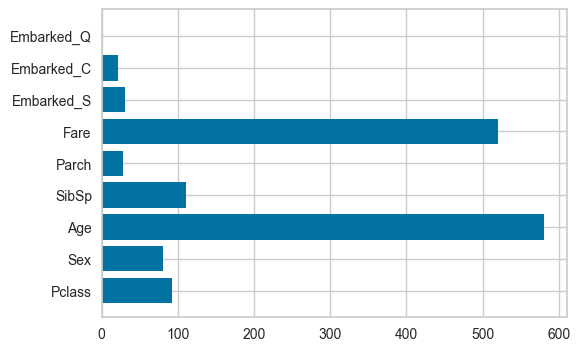

In [21]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 4))
plt.barh(tuned_lgbm_model.feature_name_, tuned_lgbm_model.feature_importances_)
plt.show()

In [17]:
tuned_lgbm_model.get_params

<bound method LGBMModel.get_params of LGBMClassifier(bagging_fraction=1.0, bagging_freq=7, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.9,
               importance_type='split', learning_rate=0.05, max_depth=-1,
               min_child_samples=1, min_child_weight=0.001, min_split_gain=0.2,
               n_estimators=180, n_jobs=-1, num_leaves=80, objective=None,
               random_state=5001, reg_alpha=1, reg_lambda=2, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)>

In [18]:
# 모델 저장
save_model(tuned_lgbm_model, "tuned_lgbm_model")

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['Pclass', 'Age', 'SibSp', 'Parch',
                                              'Fare'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                                               strategy='mean'))),
                 ('categorical_imputer',
                  TransformerWrapper(exclude=None, include=['Sex...
                                 boosting_type='gbdt', class_weight=None,
                                 colsample_bytree=1.0, fe

In [19]:
# 모델 저장
loaded_lgbm_model = load_model("tuned_lgbm_model")

Transformation Pipeline and Model Successfully Loaded


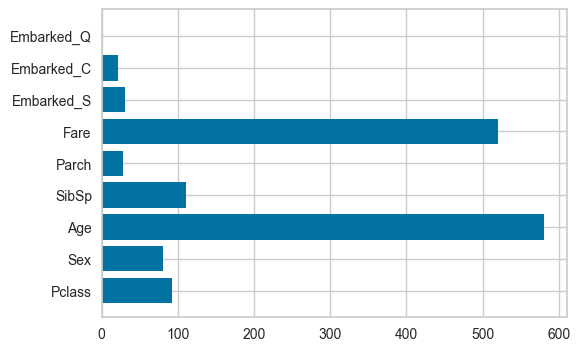

In [22]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 4))
plt.barh(loaded_lgbm_model.feature_name_, loaded_lgbm_model.feature_importances_)
plt.show()